In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
df=pd.read_csv("/content/train.csv")

In [12]:
df.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [13]:
df.isnull().sum()

,0
Id,0
Comment,0
Topic,0


In [15]:
df['Topic'].value_counts()

,count
Topic,
Biology,3591
Chemistry,2920
Physics,2184


In [16]:
df.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [17]:
# Check for duplicate valus
df.duplicated().sum()

np.int64(0)

In [60]:
import nltk

In [61]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [23]:
df['Topic']=encoder.fit_transform(df['Topic'])

In [24]:
df.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,0
1,0xbf0,Is it so hard to believe that there exist part...,2
2,0x1dfc,There are bees,0
3,0xc7e,I'm a medication technician. And that's alot o...,0
4,0xbba,Cesium is such a pretty metal.,1


<function matplotlib.pyplot.show(close=None, block=None)>

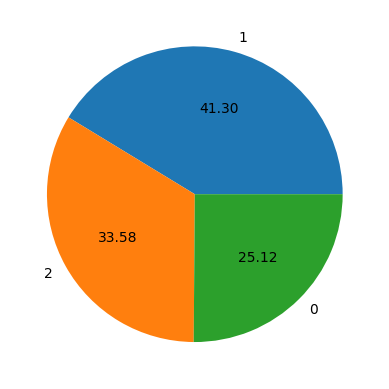

In [26]:
plt.pie(df['Topic'].value_counts(),labels=[1,2,0],autopct='%0.2f')
plt.show

In [27]:
chemistry=df[df['Topic']==1]

In [28]:
physics=df[df['Topic']==2]

In [29]:
Biology=df[df['Topic']==0]

In [32]:
print("chemistry shape",chemistry.shape)

chemistry shape (2920, 3)


In [31]:
print("physics shape",physics.shape)

physics shape (2184, 3)


In [33]:
print("Biology shape",Biology.shape)

Biology shape (3591, 3)


In [34]:
chemistry=chemistry.sample(physics.shape[0])

In [36]:
chemistry.shape

(2184, 3)

In [37]:
Biology=Biology.sample(physics.shape[0])

In [39]:
Biology.shape

(2184, 3)

In [41]:
#Checking the shape of the data
chemistry.shape,physics.shape,Biology.shape

((2184, 3), (2184, 3), (2184, 3))

In [43]:
#append all three labels
data=pd.concat([neutral,positive,negative],ignore_index=True)

In [44]:
data.sample(10)

,Id,Comment,Topic
3453,0x123d,they give you chagas disease be careful,0
4937,0x13d8,The g on top is not connected to the bottom eq...,2
35,0x155e,I’m a chem prof.,1
2870,0x268e,This is hilarious.,0
1715,0x1792,This is a common problem. Silica (normal phase...,1
5510,0x48a,Deceleration is just acceleration in the oppos...,2
5194,0x1f77,Sabine is so smart and so entertaining.,2
1053,0x1133,Wait you're telling me estrogen isn't a single...,1
4742,0x1745,Hmm. I would submit that many if not most hig...,2
4014,0x3e1,"Yup, looks like allenii or cyan to me",0


In [62]:
from nltk.corpus import stopwords

In [67]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [69]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [70]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [72]:
data['transformed_text']=data['Comment'].apply(transform_text)

In [73]:
data.head()

,Id,Comment,Topic,transformed_text
0,0x10ae,[deleted],1,delet
1,0x1cc,Are you adding 1 ml of each solution? Or are y...,1,ad 1 ml solut ad 1ml solvent pure chemic
2,0x1439,Wave function and a lot of derivations.,1,wave function lot deriv
3,0x167a,not sure much hydrogen gas would be generated ...,1,sure much hydrogen ga would gener sinc lot wat...
4,0x2293,It should say the molecular weight somewhere. ...,1,say molecular weight somewher one anhydr


In [76]:
from wordcloud import WordCloud

In [77]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [78]:
Biology_wc=wc.generate(data[data['Topic']==0]['transformed_text'].str.cat(sep=""))

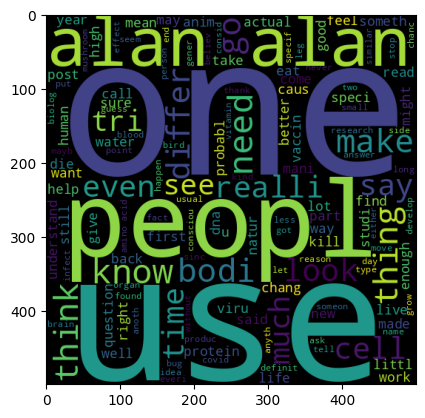

In [80]:
plt.imshow(Biology_wc)

In [82]:
chemistry_wc=wc.generate(data[data['Topic']==1]['transformed_text'].str.cat(sep=""))

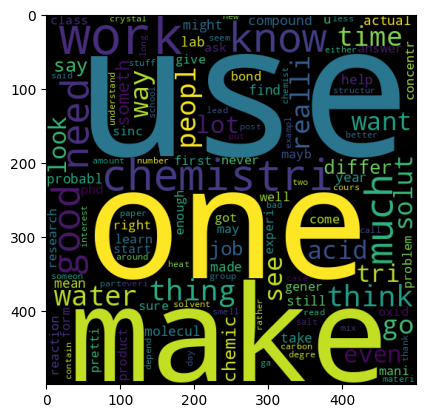

In [83]:
plt.imshow(chemistry_wc)

In [84]:
physics_wc=wc.generate(data[data['Topic']==2]['transformed_text'].str.cat(sep=""))

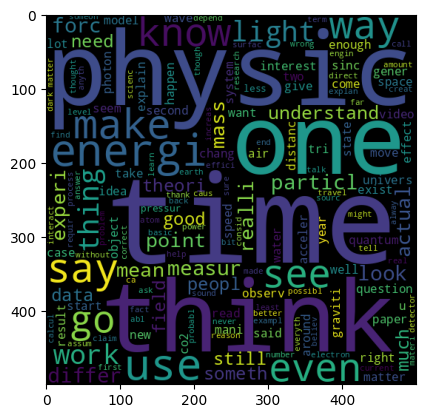

In [86]:
plt.imshow(physics_wc)

In [ ]:
from wordcloud import WordCloud

In [ ]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [ ]:
negative_wc=wc.generate(data[data['label']==0]['transformed_text'].str.cat(sep=""))

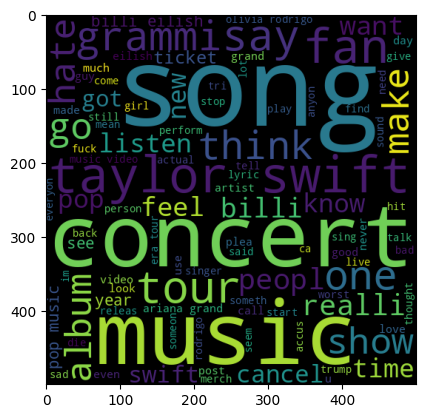

In [ ]:
plt.imshow(negative_wc)

In [ ]:
neutral_wc=wc.generate(data[data['label']==0]['transformed_text'].str.cat(sep=""))

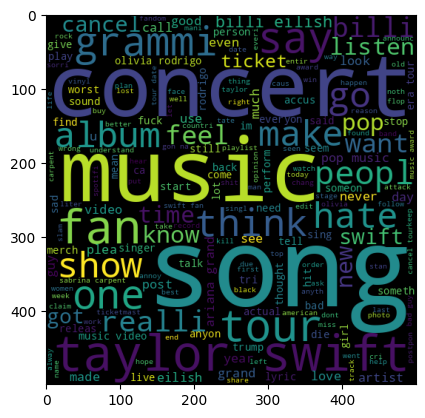

In [ ]:
plt.imshow(neutral_wc)

In [ ]:
positive_wc=wc.generate(data[data['label']==2]['transformed_text'].str.cat(sep=""))

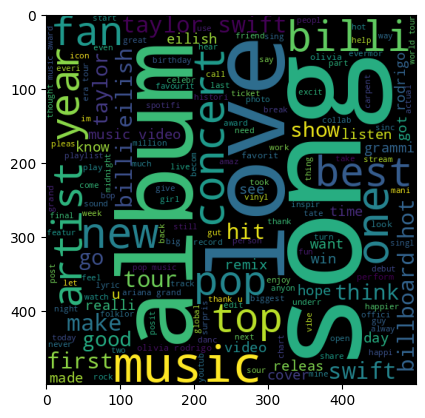

In [ ]:
plt.imshow(positive_wc)

In [87]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(data['transformed_text'],data['Topic'],test_size=0.3,random_state=0,shuffle=True)

In [91]:
x_train

,transformed_text
95,check mallinckrodt stl heard look fresh grad
3559,like anti vax dont know truth truth like argu ...
1050,could use profession univers laboratori way ne...
121,made sound like took one go
3684,yeah reli wcw report look actual studi corrobo...
...,...
4931,sound like want other homework gener idea also...
3264,kill alcohol df dude
1653,delet
2607,regardless specif bacteria seem like spoilag t...


In [92]:
y_train

,Topic
95,1
3559,0
1050,1
121,1
3684,0
...,...
4931,2
3264,0
1653,1
2607,0


In [93]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [94]:
rf_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [95]:
rf_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [96]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [97]:
rf_pred=rf_classifier.predict(x_test)

In [98]:
#Confusion Matrix
confusion_matrix(y_test,rf_pred)

array([[418, 159,  88],
       [ 98, 435, 114],
       [ 85, 152, 417]])

In [99]:
#Accuracy Score
accuracy_score(y_test,rf_pred)

0.6459816887080366

In [100]:
#Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       665
           1       0.58      0.67      0.62       647
           2       0.67      0.64      0.66       654

    accuracy                           0.65      1966
   macro avg       0.65      0.65      0.65      1966
weighted avg       0.65      0.65      0.65      1966



In [102]:
# Predict a real message
rf_classifier.predict(["could use profession univers laboratori way ne"])

array([1])

In [103]:
rf_classifier.predict(["The g on top is not connected to the bottom eq."])


array([2])

In [106]:
rf_classifier.predict(["Yup, looks like allenii or cyan to me"])


array([0])